<h1>Project: UK Road Accident</h1>
<h2>Analyst: Kyle M. De Los Santos</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

In [4]:
UKRoad = pd.read_csv("Datasets\\accident_data.csv")

In [5]:
UKRoad

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Filling Up Null Values and Changing DataTypes</h1>

In [6]:
UKRoad.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [86]:
UKRoad["Latitude"] = UKRoad["Latitude"].fillna(UKRoad["Latitude"].mode()[0])
UKRoad["Longitude"] = UKRoad["Longitude"].fillna(UKRoad["Longitude"].mode()[0])
UKRoad["Road_Surface_Conditions"] = UKRoad["Road_Surface_Conditions"].fillna(UKRoad["Road_Surface_Conditions"].mode()[0])
UKRoad["Road_Type"] = UKRoad["Road_Type"].fillna(UKRoad["Road_Type"].mode()[0])
UKRoad["Urban_or_Rural_Area"] = UKRoad["Urban_or_Rural_Area"].fillna(UKRoad["Urban_or_Rural_Area"].mode()[0])
UKRoad["Weather_Conditions"] = UKRoad["Weather_Conditions"].fillna(UKRoad["Weather_Conditions"].mode()[0])
UKRoad.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Day                        0
Month                      0
Day of Week                0
dtype: int64

In [97]:
UKRoad["Index"] = UKRoad["Index"].astype("category")
UKRoad["Accident_Severity"] = UKRoad["Accident_Severity"].astype("category")
UKRoad["Light_Conditions"] = UKRoad["Light_Conditions"].astype("category")
UKRoad["District Area"] = UKRoad["District Area"].astype("object")
UKRoad["Road_Surface_Conditions"] = UKRoad["Road_Surface_Conditions"].astype("category")
UKRoad["Road_Type"] = UKRoad["Road_Type"].astype("category")
UKRoad["Urban_or_Rural_Area"] = UKRoad["Urban_or_Rural_Area"].astype("category")
UKRoad["Weather_Conditions"] = UKRoad["Weather_Conditions"].astype("category")
UKRoad["Vehicle_Type"] = UKRoad["Vehicle_Type"].astype("category")
UKRoad.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Day                                 int32
Month                               int32
Day of Week                         int32
dtype: object

<h1>Changing the Accident Date to a Datetime dtypes using pandas</h1>

In [9]:
UKRoad["Accident Date"] = pd.to_datetime(UKRoad["Accident Date"], dayfirst = True, errors = "coerce")
UKRoad["Year"] = UKRoad["Accident Date"].dt.year
UKRoad["Day"] = UKRoad["Accident Date"].dt.day
UKRoad["Month"] = UKRoad["Accident Date"].dt.month
UKRoad["Day of Week"] = UKRoad["Accident Date"].dt.dayofweek
UKRoad.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Day                                 int32
Month                               int32
Day of Week                         int32
dtype: object

<h1>Exploratory Data Analysis (EDA)</h1>
<hr>

<h2>Basic Insights</h2>
<h2>1. What is the common Accident Severity in UK?</h2>

In [10]:
AccSev = UKRoad["Accident_Severity"].value_counts()

In [11]:
AccSev

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h4>Insights:</h4>
<h4>As we can see in the Data, the most frequent or common Accident Severity is <b>Slight</b> with a total of <b>563801</b></h4>
<hr>

<h2>2. Which district area has the highest number of accidents recorded?</h2>

In [12]:
DisAcc = UKRoad["District Area"].value_counts()

In [13]:
DisAcc

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h4>Insights:</h4>
<h4>The majority of Accidents Occured in the District Area of <b>Birmingham</b> with a total of <b>13491</b> while <b>Clackmannanshire</b> is the least in terms of Accidents with the toal of <b>91</b></h4>
<hr>

<h2>3. How many accidents happened in urban vs rural areas?</h2>

In [14]:
Urral = UKRoad['Urban_or_Rural_Area'].value_counts()

In [15]:
Urral

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h4>Insights:</h4>
<h4>Majority of the accidents occured in <b>Urban Area</b> which is predictable since Urban Area are more prone to vehicle related incidents while the Rural Area have less accidents since Rural Area rarely have a traffic, activities on the road and less density of people on the road</h4>
<hr>

<h2>4. What is the average number of casualties per accident?</h2>

In [16]:
CasAve = UKRoad["Number_of_Casualties"].mean()

In [17]:
CasAve

np.float64(1.357040257068864)

<h4>Insights:</h4>
<h4>Each accident results in about <b>1.36</b> casualties. This means that, on average, each accident involves about 1 to 2 casualties,</h4>

<h2>5. What are the most common weather conditions during accidents?</h2>

In [18]:
WeaCon = UKRoad["Weather_Conditions"].value_counts()

In [19]:
WeaCon

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h4>Insights:</h4>
<h4>Most accidents happened during the conditions of <b>Fine no high winds</b> which is quite weird since I expect the accidents to spike when it has bad weather conditions.</h4>
<hr>

<h2>Comparison Insights/Question</h2>
<h2>6. Do urban accidents tend to have more casualties than rural accidents?</h2>

In [20]:
urban_casualties = UKRoad[UKRoad['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties']
rural_casualties = UKRoad[UKRoad['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties']

In [21]:
urban_casualties.sum()

np.int64(543040)

In [22]:
urban_casualties.mean()

np.float64(1.2878072842310957)

In [23]:
rural_casualties.sum()

np.int64(353515)

In [24]:
rural_casualties.mean()

np.float64(1.4792041508012888)

<h4>Insights:</h4>
<h4>Yes, comparing the two Urban tend to have more accidents than Rural Area. Still, Urban areas in the previous insights have a significantly larger accident, somehow their casualties are quite close. I think it suggest that Rural Area is tend to have severe or slightly more dangerous than Urban Areas</h4>
<hr>

<h2>7. Is the average number of casualties higher in bad weather than in good weather?</h2>

In [25]:
good_conditions = UKRoad[(UKRoad["Weather_Conditions"] == "Fine no high winds")|
                        (UKRoad["Weather_Conditions"] == "Raining no high winds")|
                        (UKRoad["Weather_Conditions"] == "Snowing no high winds")]['Number_of_Casualties']

bad_conditions = UKRoad[(UKRoad["Weather_Conditions"] == "Raining + high winds")|
                        (UKRoad["Weather_Conditions"] == "Fine + high winds")|
                        (UKRoad["Weather_Conditions"] == "Snowing + high winds")]['Number_of_Casualties']

In [26]:
good_conditions.mean()

np.float64(1.355146252417678)

In [27]:
bad_conditions.mean()

np.float64(1.402960008397187)

<h4>Insights:</h4>
<h4>Yes, the average of number of casualties is higher in bad weather with the average of 1.40, while good weather only had 1.35. Note that I didnt add others and fog and mist since I dont know what type of weather the two are.</h4>
<hr>

<h2>8. Do accidents with multiple vehicles cause more casualties than single-vehicle accidents?</h2>

In [28]:
single_vehicle = UKRoad[UKRoad["Number_of_Vehicles"] == 1]['Number_of_Casualties']
multiple_vehicle = UKRoad[UKRoad["Number_of_Vehicles"] > 1]['Number_of_Casualties']

In [29]:
single_vehicle.sum()

np.int64(235108)

In [30]:
multiple_vehicle.sum()

np.int64(661460)

<h4>Insights:</h4>
<h4>Accidents involving Multiple vehicles tend to have more casualties than a Single Vehicle. Which is understandble since, Multiple vehicles tend to have more passengers which increases the casualties.</h4>
<hr>

<h2>9. Do accidents under “Darkness – no lighting” lead to more fatalities than those in “Daylight”?</h2>

In [31]:
Darknolight = UKRoad[UKRoad["Light_Conditions"] == "Darkness - no lighting"]['Number_of_Casualties']
Daylight = UKRoad[UKRoad["Light_Conditions"] == "Daylight"]['Number_of_Casualties']
UKRoad["Light_Conditions"].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [32]:
Darknolight.sum()

np.int64(57715)

In [33]:
Daylight.sum()

np.int64(649889)

<h4>Insights:</h4>
<h4>Surprisingly, No, Daylight tend to have more fatalities than those in Darkness no Lighting. According to the Data in the UK Road Accidents there are atleast 484,880 incidents that happen during daylight and if you look at the total casualties it results in 649,889 which is large in comparison to the incidents. This indicates that each daylight accident involved slightly more than one casualty.</h4>
<hr>

<h2>10. Do wet/icy roads lead to more casualties than dry roads?</h2>

In [34]:
UKRoad["Road_Surface_Conditions"].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [35]:
weticy = UKRoad[(UKRoad["Road_Surface_Conditions"] == "Wet or damp")|
                (UKRoad["Road_Surface_Conditions"] == "Frost or ice")]["Number_of_Casualties"]
dryroa = UKRoad[UKRoad["Road_Surface_Conditions"] == "Dry"]["Number_of_Casualties"]

In [36]:
weticy.sum()

np.int64(288433)

In [37]:
dryroa.sum()

np.int64(598606)

<h4>Insights:</h4>
<h4>No, wet/icy roads doesn't lead to more casualties compared to Dry Roads. Which kinda makes sense, Drivers tend to control their speed which helps to reduce road accidents.</h4>
<hr>

<h2>11. Do motorcycles have a higher rate of serious/fatal accidents compared to cars?</h2>

In [38]:
motor = UKRoad[(UKRoad["Vehicle_Type"] == "Motorcycle over 500cc")|
               (UKRoad["Vehicle_Type"] == "Motorcycle 125cc and under")|
               (UKRoad["Vehicle_Type"] == "Motorcycle over 125cc and up to 500cc")|
               (UKRoad["Vehicle_Type"] == "Motorcycle 50cc and under")]
cars = UKRoad[UKRoad["Vehicle_Type"] == "Car"]

In [39]:
motor_severe = motor[(motor["Accident_Severity"] == "Fatal") | 
                     (motor["Accident_Severity"] == "Serious")]
car_severe = cars[(cars["Accident_Severity"] == "Fatal") | 
                     (cars["Accident_Severity"] == "Serious")]

In [40]:
motor_severe.value_counts().sum()

np.int64(8244)

In [41]:
car_severe.value_counts().sum()

np.int64(73038)

<h4>Insights:</h4>
<h4>Apparently not, despite combining 4 types of motocycles it's still doesn't have a higher rate of Serious/Fatal accidents compared to Cars. It indicates that there are motorcycle drivers dont risk themself getting injured that's why the result is low</h4>
<hr>

<h2>12. Do accidents involving buses or heavy vehicles lead to more casualties on average compared to cars and motorcycles?</h2>

In [42]:
heavycars = UKRoad[(UKRoad["Vehicle_Type"] == "Goods 7.5 tonnes mgw and over")|
                   (UKRoad["Vehicle_Type"] == "Goods over 3.5t. and under 7.5t")|
                   (UKRoad["Vehicle_Type"] == "Bus or coach (17 or more pass seats)")|
                   (UKRoad["Vehicle_Type"] == "Minibus (8 - 16 passenger seats)")|
                   (UKRoad["Vehicle_Type"] == "Agricultural vehicle")]

carmotor = UKRoad[(UKRoad["Vehicle_Type"] == "Motorcycle over 500cc")|
                  (UKRoad["Vehicle_Type"] == "Motorcycle 125cc and under")|
                  (UKRoad["Vehicle_Type"] == "Motorcycle over 125cc and up to 500cc")|
                  (UKRoad["Vehicle_Type"] == "Motorcycle 50cc and under")|
                  (UKRoad["Vehicle_Type"] == "Car")]

In [43]:
heavycars["Number_of_Casualties"].sum()

np.int64(71892)

In [44]:
carmotor["Number_of_Casualties"].sum()

np.int64(752372)

<h4>Insights:</h4>
<h4>Comparing the Buses/Heavy Vehicles casualties to Cars and Motorcycles, the answer is NO. Which is quite understandble, these heavy vehicles have the greater chance to survive resulting in less casualties than cars and motorcycles. I also think that it's because the heavy vehicles can survive but can cause casualties to cars and motocycles.</h4>
<hr>

<h2>13. Do more fatal accidents happen at single carriageway compared to dual carriageway?</h2>

In [45]:
Single = UKRoad[UKRoad["Road_Type"] == "Single carriageway"]
Dual = UKRoad[UKRoad["Road_Type"] == "Dual carriageway"]

In [46]:
Singleacc = Single[Single["Accident_Severity"] == "Fatal"]
Dualacc = Dual[Dual["Accident_Severity"] == "Fatal"]

In [47]:
Singleacc.value_counts().sum()

np.int64(6560)

In [48]:
Dualacc.value_counts().sum()

np.int64(1815)

<h4>Insights:</h4>
<h4>Yes, the answer above shows that Single Carriageway are more prone to fatall accidents, than Dual Carriageway.</h4>
<hr>

<h2>14. In urban areas, are night-time accidents more serious than daytime accidents?</h2>

In [49]:
urban = UKRoad[UKRoad["Urban_or_Rural_Area"] == "Urban"]

In [50]:
night = urban[(urban["Light_Conditions"] == "Darkness - lights lit")|
               (urban["Light_Conditions"] == "Darkness - no lighting")|
               (urban["Light_Conditions"] == "Darkness - lighting unknown")|
               (urban["Light_Conditions"] == "Darkness - lights unlit")]
day = urban[(UKRoad["Light_Conditions"] == "Daylight")]

In [51]:
night[night["Accident_Severity"] == "Serious"].value_counts().sum()

np.int64(16276)

In [52]:
day[day["Accident_Severity"] == "Serious"].value_counts().sum()

np.int64(34628)

<h4>Insights:</h4>
<h4>No, Night time accidents in Urban areas have less serious accidents than daytime accidents. This indicates that there are drivers in Night-time to be cautious not contributing to the rest of the Serious Accidents</h4>
<hr>

<h2>15. Do foggy conditions lead to more multi-vehicle casualties compared to clear weather?</h2>

In [53]:
foggymulti = UKRoad[(UKRoad["Weather_Conditions"] == "Fog or mist") & 
                    (UKRoad["Number_of_Vehicles"] > 1)] 
clearmulti = UKRoad[(UKRoad["Weather_Conditions"] == "Fine no high winds") & 
                    (UKRoad["Number_of_Vehicles"] > 1)]

In [54]:
foggymulti["Number_of_Casualties"].sum()

np.int64(3365)

In [55]:
clearmulti["Number_of_Casualties"].sum()

np.int64(535686)

<h4>Insights:</h4>
<h4>No, foggy conditions have fewer casualties than clear weather. Because it indicates that driver that are in the foggy conditions are more careful for their safety than the drivers in clear weather who possibly risk danger.</h4>
<hr>

<h2>Correlational Insight</h2>
<h2>16. Does the type of road (single carriageway, dual carriageway, roundabout, etc.) correlate with the number of casualties?</h2>

In [56]:
f_oneway(UKRoad[UKRoad["Road_Type"] == "Single carriageway"]["Number_of_Casualties"],
         UKRoad[UKRoad["Road_Type"] == "Dual carriageway"]["Number_of_Casualties"],
         UKRoad[UKRoad["Road_Type"] == "Roundabout"]["Number_of_Casualties"],
         UKRoad[UKRoad["Road_Type"] == "One way street"]["Number_of_Casualties"],
         UKRoad[UKRoad["Road_Type"] == "Slip road"]["Number_of_Casualties"])

F_onewayResult(statistic=np.float64(819.3651972547109), pvalue=np.float64(0.0))

<h4>Insights:</h4>
<h4>It appears that there are no correlation between the type of roads with the number of casualties. Since, the PValue of the two variables results is 0.0.</h4>
<hr>

<h2>17. Do weather conditions correlate with the number of vehicles involved in accidents?</h2>

In [57]:
f_oneway(UKRoad[UKRoad["Weather_Conditions"] == "Fine no high winds"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Weather_Conditions"] == "Raining no high winds"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Weather_Conditions"] == "Other"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Weather_Conditions"] == "Raining + high winds"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Weather_Conditions"] == "Fine + high winds"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Weather_Conditions"] == "Snowing no high winds"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Weather_Conditions"] == "Fog or mist"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Weather_Conditions"] == "Snowing + high winds"]["Number_of_Vehicles"])

F_onewayResult(statistic=np.float64(43.91229979962255), pvalue=np.float64(1.656209490583519e-62))

<h4>Insights:</h4>
<h4>It Correlates!, the number of vehicles involved in accidents correlates with weather conditions.</h4>
<hr>

<h2>18. Does the number of vehicles involved correlate with accident severity (fatal, serious, slight)?</h2>

In [58]:
f_oneway(UKRoad[UKRoad["Accident_Severity"] == "Slight"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Accident_Severity"] == "Serious"]["Number_of_Vehicles"],
         UKRoad[UKRoad["Accident_Severity"] == "Fatal"]["Number_of_Vehicles"])

F_onewayResult(statistic=np.float64(2383.6601993261174), pvalue=np.float64(0.0))

<h4>Insights:</h4>
<h4>It does not correlate.</h4>
<hr>

<h2>19. Is there a correlation between the number of vehicles involved and the number of casualties in an accident?</h2>

In [59]:
UKRoad[["Number_of_Casualties","Number_of_Vehicles"]].corr()

,Number_of_Casualties,Number_of_Vehicles
Number_of_Casualties,1.000000,0.228889
Number_of_Vehicles,0.228889,1.000000


<h4>Insights:</h4>
<h4>There is a weak positive correlation between the number of vehicles and the number of casualties in accidents.</h4>
<hr>

<h2>20. Does the number of casualties correlate with road surface conditions (e.g., icy/wet vs dry)?</h2>

In [60]:
f_oneway(UKRoad[UKRoad["Road_Surface_Conditions"] == "Dry"]["Number_of_Casualties"],
         UKRoad[UKRoad["Road_Surface_Conditions"] == "Wet or damp"]["Number_of_Casualties"],
         UKRoad[UKRoad["Road_Surface_Conditions"] == "Frost or ice"]["Number_of_Casualties"],
         UKRoad[UKRoad["Road_Surface_Conditions"] == "Snow"]["Number_of_Casualties"],
         UKRoad[UKRoad["Road_Surface_Conditions"] == "Flood over 3cm. deep"]["Number_of_Casualties"])

F_onewayResult(statistic=np.float64(291.795863453585), pvalue=np.float64(3.459691867779366e-251))

<h4>Insights:</h4>
<h4>Yes, road surface conditions correlate with the number of casualties.</h4>
<hr>

<h1>Univariate/Bivariate/Multivariate Analysis</h1>
<h2>Date Time Insights</h2>

In [61]:
import matplotlib.pyplot as plt
yearly_severity = UKRoad.groupby(['Accident_Severity','Year']).size().unstack(level=0)

In [62]:
yearly_severity

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


<h4>21. Insights:</h4>
<h4>According to the data above, all types of Severity (Fatal, Serious and Slight) are decreasing from 2019 to 2022. Fatal accidents dropped from <b>2714</b> to <b>1549</b>, which is about 43% fatality reduction.</b></h4>
<hr>
<h4>22. Insights:</h4>
<h4>Following the Insights in number 21. The reduction of accident in 2020 and 2021 are mostly due to the Impact of Covid, it's possible that the reduced travel, stric rules about going outside contributed the drop of accidents. </h4>
<hr>
<h4>23. Insights:</h4>
<h4>Even the restrictions are lifted in late 2021 to 2022, the decline still persisted. This indicates that the effect of the strict rules are still applied eventhough the lockdown are done.</h4>
<hr>

<h2>24. Which months record the highest number of accidents?</h2>

In [63]:
month_counts = UKRoad["Month"].value_counts().sort_index()

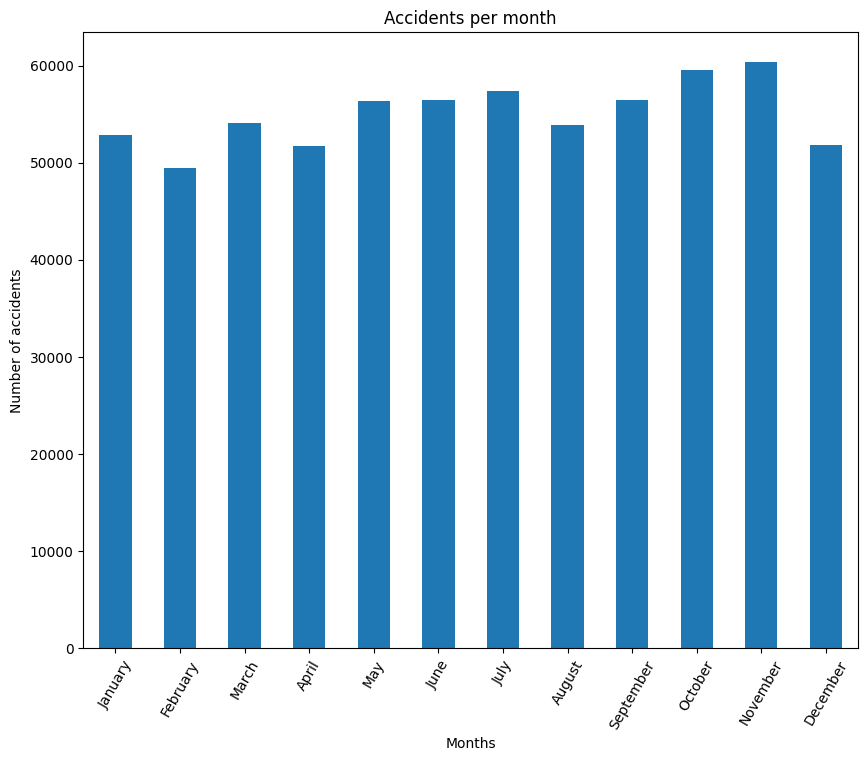

In [64]:
labels = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
month_counts.plot(kind='bar', figsize=(10,8))
plt.xlabel('Months')
plt.ylabel('Number of accidents')
plt.title('Accidents per month')
plt.xticks(ticks=range(12), labels=labels, rotation=60)
plt.show()

<h4>Insights:</h4>
<h4>With the data provided by our bargraph, it shows that november is the month where most accidents occurs, while the lowest is the month of february with the lowest. So in conclusion, November has about 22.1% more casualties than February.</h4>
<hr>

<h2>25. Which months record the highest number of fatal accidents?</h2>

In [65]:
fatalpermonth = UKRoad[UKRoad["Accident_Severity"] == "Fatal"]["Month"].value_counts().sort_index()

In [70]:
#Bargraph
# labels = ["January", "February", "March", "April", "May", "June", 
#           "July", "August", "September", "October", "November", "December"]
# fatalpermonth.plot(kind='bar', figsize=(10,8))
# plt.xlabel('Months')
# plt.ylabel('Number of accidents')
# plt.title('Accidents per month')
# plt.xticks(ticks=range(12), labels=labels, rotation=60)
# plt.show()

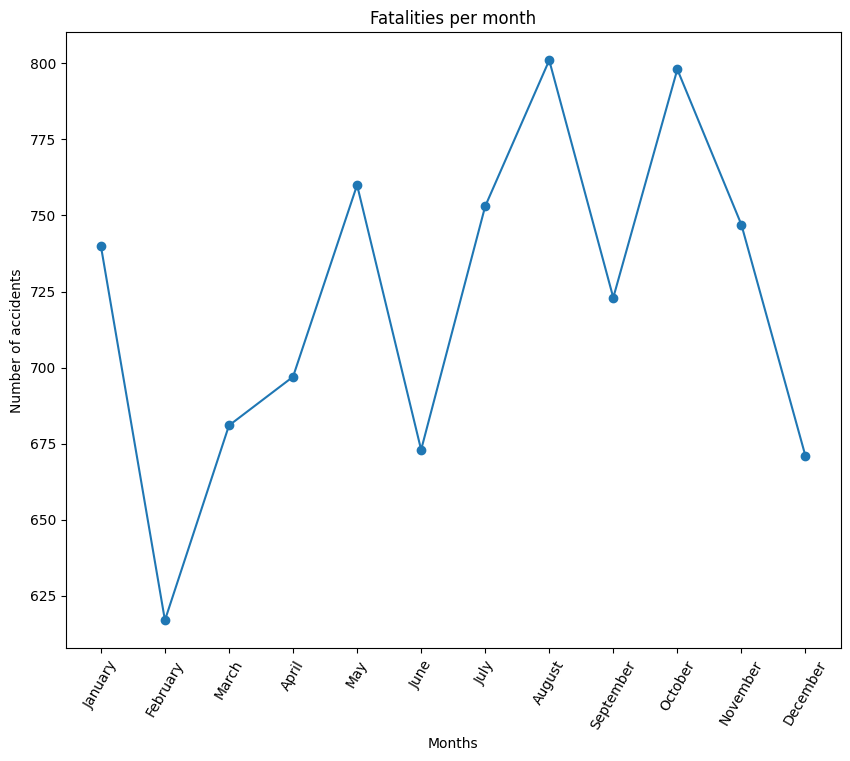

In [67]:
labels = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
fatalpermonth.plot(kind='line', figsize=(10,8), marker='o')
plt.xlabel('Months')
plt.ylabel('Number of accidents')
plt.title('Fatalities per month')
plt.xticks(ticks=range(1, 13), labels=labels, rotation=60)
plt.show()

<h4>Insights:</h4>
<h4>Comparing the previous data in Number 24. This data shows the fatalities of the accidents. It shows here that August have the highest fatal accidents, followed by Octobeer. In the previous data we have November having the highest accidents than other months, but here it's show that november is 5th highest in terms of fatal accidents. Moreover, the month of February in the previous data having the lowest accidents is actually having the lowest fatal accidents in this data.</h4>
<hr>

<h1>GEO SPATIAL</h1>
<h2>Using FOLIUM and LEAFLET JS</h2>

In [73]:
import folium
from folium.plugins import HeatMap

In [98]:
UKRoad["District Area"].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [99]:
#Kensington and Chelsea
Ken_Chel_DF = UKRoad[UKRoad["District Area"] == 'Kensington and Chelsea']

In [88]:
locations = list(zip(Ken_Chel_DF['Latitude'], Ken_Chel_DF['Longitude']))
m = folium.Map(locations = [Ken_Chel_DF['Latitude'].mean(), Ken_Chel_DF['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("Ken_Chel_CF.html")
m

In [101]:
#Mid Sussex
Mid_Sussex_DF = UKRoad[UKRoad["District Area"] == 'Mid Sussex']

In [102]:
locations = list(zip(Mid_Sussex_DF['Latitude'], Mid_Sussex_DF['Longitude']))
m = folium.Map(locations = [Mid_Sussex_DF['Latitude'].mean(), Mid_Sussex_DF['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("Ken_Chel_CF.html")
m

In [103]:
#Shetland Islands
Shetland_Islands_DF = UKRoad[UKRoad["District Area"] == 'Shetland Islands']

In [104]:
locations = list(zip(Shetland_Islands_DF['Latitude'], Shetland_Islands_DF['Longitude']))
m = folium.Map(locations = [Shetland_Islands_DF['Latitude'].mean(), Shetland_Islands_DF['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("Ken_Chel_CF.html")
m

In [ ]:
#Shetland Islands
Shetland_Islands_DF = UKRoad[UKRoad["District Area"] == 'Shetland Islands']